In [13]:
print("hello world")

hello world


In [14]:
a = 10
print(a)

10


In [15]:
b = 10 * a
# jupyter will automatically print the last value in the block
# and by the way: this is how a comment looks. 
b

100

In [16]:
if b > 50:
    print("b is greater than 50") 

b is greater than 50


Python can handle numbers of arbitrary length :)

What's actually $2^{2048}$?

In [17]:
2**2048

32317006071311007300714876688669951960444102669715484032130345427524655138867890893197201411522913463688717960921898019494119559150490921095088152386448283120630877367300996091750197750389652106796057638384067568276792218642619756161838094338476170470581645852036305042887575891541065808607552399123930385521914333389668342420684974786564569494856176035326322058077805659331026192708460314150258592864177116725943603718461857357598351152301645904403697613233287231227125684710820209725157101726931323469678542580656697935045997268352998638215525166389437335543602135433229604645318478604952148193555853611059596230656

## define a function

In [18]:
def square(x):
    return x * x

print(f"square(10) is {square(10)}")

# or as lambda statement 

qubic = lambda x: x * x * x
print(f"qubic(10) is {qubic(10)}")


square(10) is 100
qubic(10) is 1000


## loops and formated strings

In [19]:
for i in range(1,10):
    print(f"square({i}) = {square(i)}")

square(1) = 1
square(2) = 4
square(3) = 9
square(4) = 16
square(5) = 25
square(6) = 36
square(7) = 49
square(8) = 64
square(9) = 81


## Which numbers appear in both a and b?

In [20]:
a = [1,2,3,4,5]
b = [4,5,6,7,8]

In [21]:
result = []
for number in a:
    if number in b:
        result.append(number)
        
result

[4, 5]

## and more a more compact version with list comprehensions

In [22]:
[number for number in a if number in b]

[4, 5]

how does this work?

In [23]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
[square(i) for i in range(1,10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [25]:
# this will produce the same output

list(map(square,range(1,10)))

# map applies the function (square) to every element of a sequence (numbers 1 to 10)

[1, 4, 9, 16, 25, 36, 49, 64, 81]

and this works for strings too

In [26]:
[char for char in "hello world"]

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

## let's plot something

To plot a graph, we need to import matplotlib


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

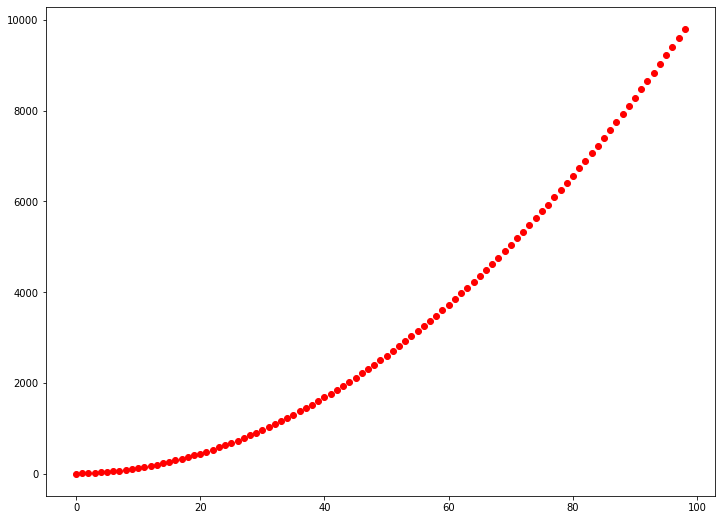

In [28]:
data = [square(i) for i in range(1,100)]

l = plt.plot(data, 'ro')
plt.show()

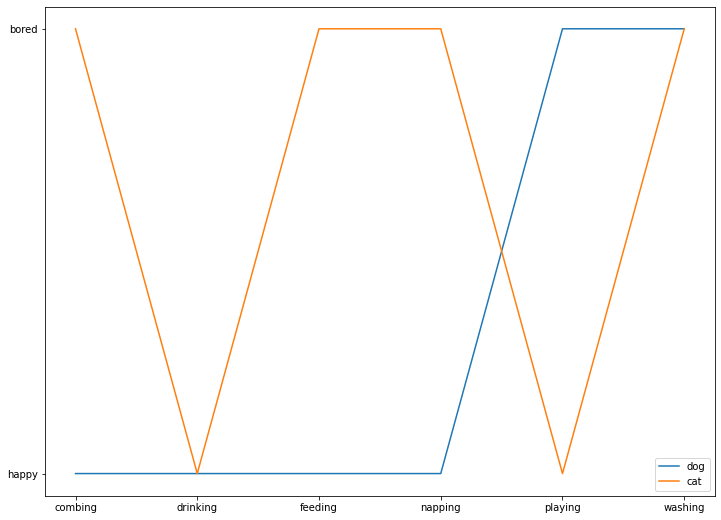

In [29]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

# Classes and Objects

Python supports object-oriented programming. Packing your code into classes will help you to keep your code organized, maintainable and it also improves the reusability. You can read about classes in the [Python Docs](https://docs.python.org/3/tutorial/classes.html).

Ok, let's define a simple example class for a data loader. Since all deep learning models need data, data loader are very common and you'll find them in various forms. 

In [30]:
class SensorData:
    """A simple class that manages sensor data"""
    
    def __init__(self, url):
        # this is how a constructor in python looks
        self.data_url = url # data url will be a member or class variable
        
    def load_data(self):
        print(f"Todo: load data from {self.data_url}")        

# lets create a instance for our new class
someSensorData = SensorData("http://somewehere-over-the-rainbow.com")
someSensorData.load_data()

Todo: load data from http://somewehere-over-the-rainbow.com


If you are familiar with object-oriented programming this should look familiar to you. 

## Ok, let's add the code to load some data

Now we will extend the class to download some sensor data. The file is CSV formatted and contains a list of temperature, humidity and time values. This is how one line with one data point looks like:

```2018-10-03T11:28:35.325Z;23.0;17.0```


In [31]:
import csv
import urllib

class SensorData:
    """A simple class that loads sensor data"""
    
    def __init__(self, url):
        # this is how a constructor in python looks
        self.data_url = url # dataUrl will be a member or class variable
        
    def load_data(self):
        response = urllib.request.urlopen(self.data_url) # create a http request
        csv_lines = response.read().decode('utf-8').splitlines() # read utf-8 text
        reader = csv.reader(csv_lines, delimiter=';') # read csv
        self.data = [row for row in reader] # convert csv to array
        print(f"{reader.line_num} lines loaded")

# lets create a instance for our new class
temp_hum_data = SensorData("https://www2.htw-dresden.de/~guhr/dist/sensor-data.csv")
temp_hum_data.load_data()

92547 lines loaded


We added some code to load the data via http from a webserver. To download the data we imported `urllib.request`, this package handels the http communication for us. Since our data is stored in a csv file, we imported the `csv` package to read the data.

## Plot the data

Now that we downloaded the data we can plot it. The data property of our class contains a list with our 
**time** - **temperature** - **humidity** values. And the first entry looks like this:

In [32]:
temp_hum_data.data[0]

['2017-10-25T10:23:33.556Z', '24.0', '38.0']

In [33]:
type(temp_hum_data.data[0][0])

str

All three values are strings, in order to plot them we need to convert them into time and float values. 

In [34]:
import csv
import urllib
import datetime as dt

class SensorData:
    """A simple class that loads sensor data"""
    
    def __init__(self, url):
        # this is how a constructor in python looks
        self.data_url = url # dataUrl will be a member or class variable
        
    def load_data(self):
        response = urllib.request.urlopen(self.data_url) # create a http request
        csvlines = response.read().decode('utf-8').splitlines() # read utf-8 text
        reader = csv.reader(csvlines, delimiter=';') # read csv
        data = [row for row in reader] # convert csv to array
        self.data = SensorData.parse_data(data) # since parse_data is a static method we call it by using the classname
        print(f"{reader.line_num} lines loaded")
    
    def parse_data(data): # I am a static method
        # this lambda converts a time string into a python datetime object
        parse_time = lambda time_string: dt.datetime.strptime(time_string, "%Y-%m-%dT%H:%M:%S.%fZ")        
        data = [[parse_time(value[0]),float(value[1]),float(value[2])] for value in data]
        return data
        

# lets create a instance for our new class
temp_hum_data = SensorData("https://www2.htw-dresden.de/~guhr/dist/sensor-data.csv")
temp_hum_data.load_data()

92547 lines loaded


In [35]:
temp_hum_data.data[0]

[datetime.datetime(2017, 10, 25, 10, 23, 33, 556000), 24.0, 38.0]

We converted the data to native python datatypes.

### Our data is now formatted as native python data types. Now we can plot them:

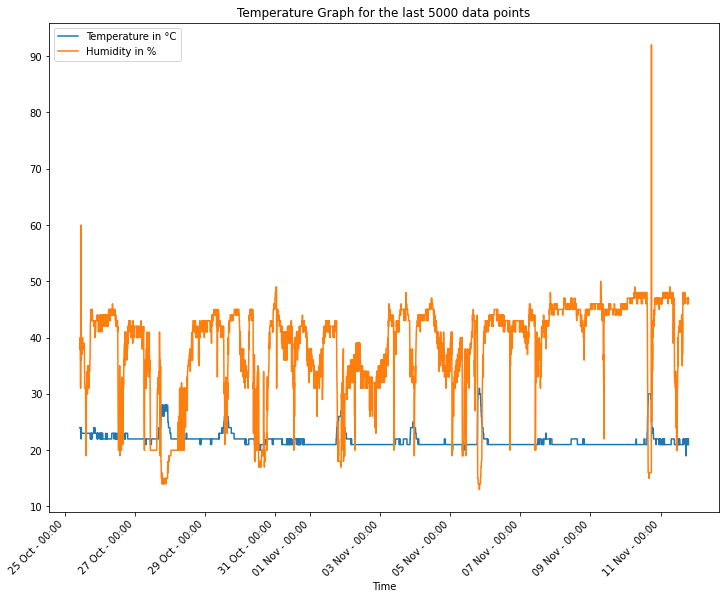

In [61]:
import matplotlib.dates as mdates

# take the last 5000 values and slice them
plotdata = temp_hum_data.data[:5000] 
time = [value[0] for value in plotdata]
temp = [value[1] for value in plotdata]
hum = [value[2] for value in plotdata]

fig, ax = plt.subplots()
date_formatter = mdates.DateFormatter('%d %h - %H:%M')
ax.xaxis.set_major_formatter(date_formatter)

ax.plot(time, temp, label="Temperature in °C")
ax.plot(time, hum, label="Humidity in %")
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.title(f'Temperature Graph for the last {len(plotdata)} data points')
plt.show()

### Of course there are ready made packages to load csv files:

In [58]:
import pandas as pd
data_frame = pd.read_table("https://www2.htw-dresden.de/~guhr/dist/sensor-data.csv", sep = ";", names=["Date", "Temperature", "Humidity"])
data_frame.head()

,Date,Temperature,Humidity
0,2017-10-25T10:23:33.556Z,24.0,38.0
1,2017-10-25T10:28:33.606Z,24.0,38.0
2,2017-10-25T10:33:33.688Z,24.0,38.0
3,2017-10-25T10:38:33.790Z,24.0,40.0
4,2017-10-25T10:43:33.834Z,24.0,39.0


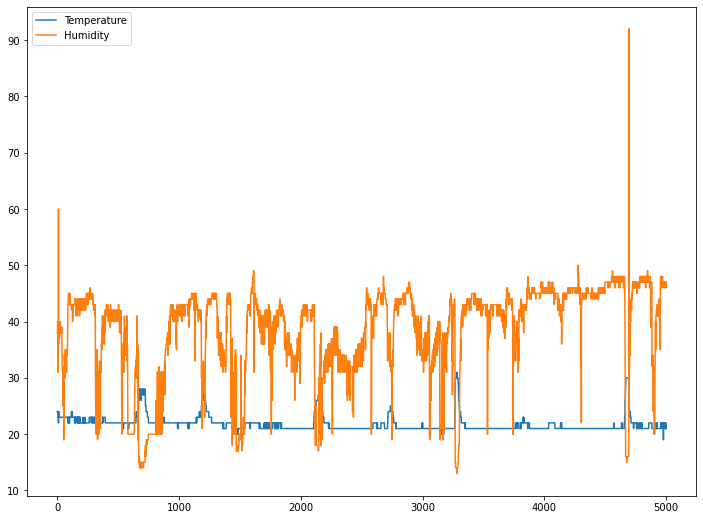

In [57]:
data_frame[:5000].plot()

# Tutotrials

If you are new to Python here is a list of online tutorials that you might find useful:

*Learn the Basics*

- [Hello, World!](https://www.learnpython.org/en/Hello%2C_World!)
- [Variables and Types](https://www.learnpython.org/en/Variables_and_Types)
- [Lists](https://www.learnpython.org/en/Lists)
- [Basic Operators](https://www.learnpython.org/en/Basic_Operators)
- [String Formatting](https://www.learnpython.org/en/String_Formatting)
- [Basic String Operations](https://www.learnpython.org/en/Basic_String_Operations)
- [Conditions](https://www.learnpython.org/en/Conditions)
- [Loops](https://www.learnpython.org/en/Loops)
- [Functions](https://www.learnpython.org/en/Functions)
- [Classes and Objects](https://www.learnpython.org/en/Classes_and_Objects)
- [Dictionaries](https://www.learnpython.org/en/Dictionaries)
- [Modules and Packages](https://www.learnpython.org/en/Modules_and_Packages)
